In [1]:
!pip install mplfinance

     |████████████████████████████████| 64 kB 2.0 MB/s 


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mplfinance as mpf
from matplotlib import style
import numpy as np
import urllib
import datetime as dt
import pandas as pd
import csv
import seaborn as sns

In [4]:
style.use("ggplot")

In [5]:
def preprocess_num(col):
  col_processed = []
  for el in col:
    el = el.replace(",", "")
    if el.find(".") != -1:
      el = float(el)
    else:
      el = int(el)
    col_processed.append(el)
  return col_processed

In [6]:
def preprocess_data():
  df = pd.read_csv('/content/drive/MyDrive/Intro_DS_2021/Raw Data/IXIC.csv', parse_dates=True)

  df = df.dropna()

  df.drop(df[df['Volume'] == "-"].index, inplace = True)

  df.to_csv('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/IXIC_preprocessed.csv', index=False)

  file = open('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/IXIC_preprocessed.csv')

  csvreader = csv.reader(file)

  header = next(csvreader)

  Open = []

  high = []
  
  low = []

  close = []

  adj_close = []

  volume = []

  for row in csvreader:
    Open.append(row[1])
    high.append(row[2])
    low.append(row[3])
    close.append(row[4])
    adj_close.append(row[5])
    volume.append(row[6])

  open_preprocessed = preprocess_num(Open)
  high_preprocessed = preprocess_num(high)
  low_preprocessed = preprocess_num(low)
  close_preprocessed = preprocess_num(close)
  adj_close_preprocessed = preprocess_num(adj_close)
  volume_preprocessed = preprocess_num(volume)

  df = pd.read_csv('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/IXIC_preprocessed.csv', parse_dates=True)

  df["Open"] = open_preprocessed

  df["High"] = high_preprocessed

  df["Low"] = low_preprocessed

  df["Close"] = close_preprocessed

  df["Adj Close"] = adj_close_preprocessed

  df["Volume"] = volume_preprocessed

  df = df.iloc[::-1]

  df.to_csv('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/IXIC_preprocessed.csv', index=False)

In [7]:
preprocess_data()

FileNotFoundError: ignored

In [ ]:
SAVA_df = pd.read_csv('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/SAVA_preprocessed.csv', parse_dates=True)

PTN_df = pd.read_csv('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/PTN_preprocessed.csv', parse_dates=True)

IXIC_df = pd.read_csv('/content/drive/MyDrive/Intro_DS_2021/Preprocessing Data/IXIC_preprocessed.csv', parse_dates=True)

mpf.plot(df["2021-05": "2021-11"], type='line', style="yahoo", ylabel='Price',
            ylabel_lower='Volume', title="PTN", figratio=(25,10),
            figscale=1, mav=20, volume=True, tight_layout=True, savefig="/content/drive/MyDrive/Intro_DS_2021/Line_Plot/PTN_Line.jpg")

In [ ]:
sns.set_style('whitegrid')
plt.title("IXIC Highest Price Distribution")
sns_hist = sns.distplot(df['High'], kde = True, color ='green', bins = 20)
fig = sns_hist.get_figure()
fig.savefig('/content/drive/MyDrive/Intro_DS_2021/Comparision/IXIC_High.jpg')

In [ ]:
SAVA_df["Date"] = pd.to_datetime(SAVA_df["Date"])
PTN_df["Date"] = pd.to_datetime(PTN_df["Date"])
IXIC_df["Date"] = pd.to_datetime(IXIC_df["Date"])

In [ ]:
SAVA = SAVA_df.groupby(SAVA_df["Date"].dt.year)["Volume"].mean()
PTN = PTN_df.groupby(PTN_df["Date"].dt.year)["Volume"].mean()
IXIC = IXIC_df.groupby(IXIC_df["Date"].dt.year)["Volume"].mean()

In [ ]:
SAVA = SAVA.reset_index()
PTN = PTN.reset_index()
IXIC = IXIC.reset_index()

In [ ]:
SAVA["Name"] = "SAVA"
PTN["Name"] = "PTN"
IXIC["Name"] = "IXIC"

In [ ]:
final_df = pd.concat([SAVA, PTN, IXIC], axis=0)

In [ ]:
final_df

,Date,Volume,Name
0,2000,7.159542e+03,SAVA
1,2001,1.173179e+04,SAVA
2,2002,1.002147e+04,SAVA
3,2003,2.356012e+04,SAVA
4,2004,2.938877e+04,SAVA
...,...,...,...
17,2017,1.907513e+09,IXIC
18,2018,2.235424e+09,IXIC
19,2019,2.119100e+09,IXIC
20,2020,3.986849e+09,IXIC


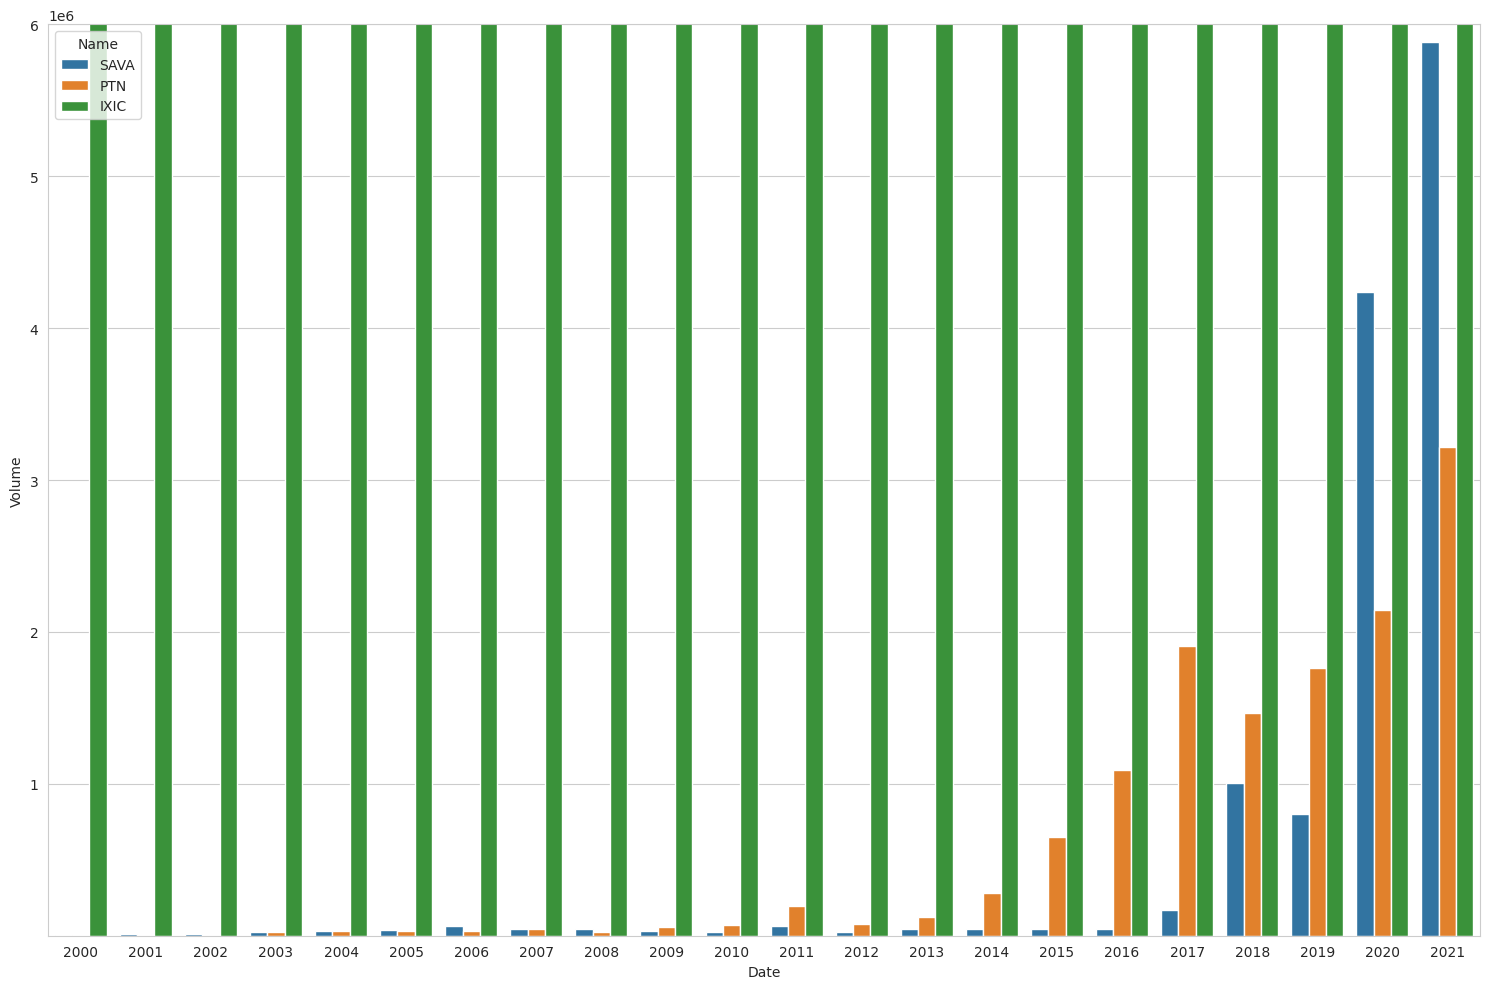

In [ ]:
plt.figure(figsize = (15,10))

sns_barplot = sns.barplot(x = 'Date',
            y = 'Volume',
            hue = 'Name',
            data = final_df)


fig = sns_barplot.get_figure()
plt.ylim(1e3, 6e6)
plt.tight_layout()
plt.show()
fig.savefig('/content/drive/MyDrive/Intro_DS_2021/Comparision/Volume_Comparision.jpg')